# Regresión Lineal I

En este notebook intentaremos predecir cuántas veces será compartido en Redes Sociales un artículo de Machine Learning según algunas de sus características.

**Recuerda guardar una copia de este notebook en tu drive si estás trabajando en ambiente cloud con Google Colaboratory**

## Importar las librerías

Antes de empezar vamos a importar las siguientes librerías:

*   Numpy
*   Pandas
*   Seaborn
*   Matplotlib
*   Scikit Learn


In [343]:
# Importa las librerías a nuestro entorno de trabajo
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Cargar un archivo de datos
Hay varias maneras de cargar un archivo de datos en nuestro entorno. El archivo lo podemos llamar desde una URL, desde una carpeta de nuestro drive o tener guardado de forma local en nuestra computadora.

En este caso subiremos un primer archivo en forma local ejecutando lo siguiente:

(el profesor te facilitará los archivos)

In [345]:
#cargamos los datos de entrada
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#    name=fn
data = pd.read_csv("C:/Personal/Docencia/Introducción al machine learning 2024/articulos_ml.csv", sep=",")



## Análisis Exploratorio

Realicemos un análisis exploratorio de los datos cargados en el dataframe.


In [347]:
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [348]:
#son 161 registros con 8 columnas. Veamos los primeros registros para tener una idea
data.head(10)

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
5,5 ways Data Science and Machine Learning impac...,NaN,761,0,NaN,1,14,21000
6,200 universities just launched 600 free online...,https://qz.com/1120344/200-universities-just-l...,6462,600,28.0,2,170,200000
7,How Machine Learning can help Cryptocurrency T...,https://cryptovest.com/news/how-machine-learni...,753,3,0.0,1,78,77000
8,Tech companies should stop pretending AI won’t...,https://www.technologyreview.com/s/610298/tech...,1118,2,NaN,1,62,59400
9,Artificial intelligence is going to completely...,NaN,1581,4,NaN,2,60,35000


## ¿Qué observaciones puedes realizar de los datos?


In [350]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Escribe tu análisis aquí

## ¿Qué observaciones puedes indicar de estas estadísticas?

¿Cuál es la media de la Cantidad de palabras?

¿Cuales son los artículos más pequeños y los más grandes? (en cantidad de palabras)



## Visualizamos Cantidad de Palabras vs. Compartidos

Para esto graficaremos en dos dimensiones las variables indicadas. 

Así, visualizaremos una variable con color naranja y otra con color azul.

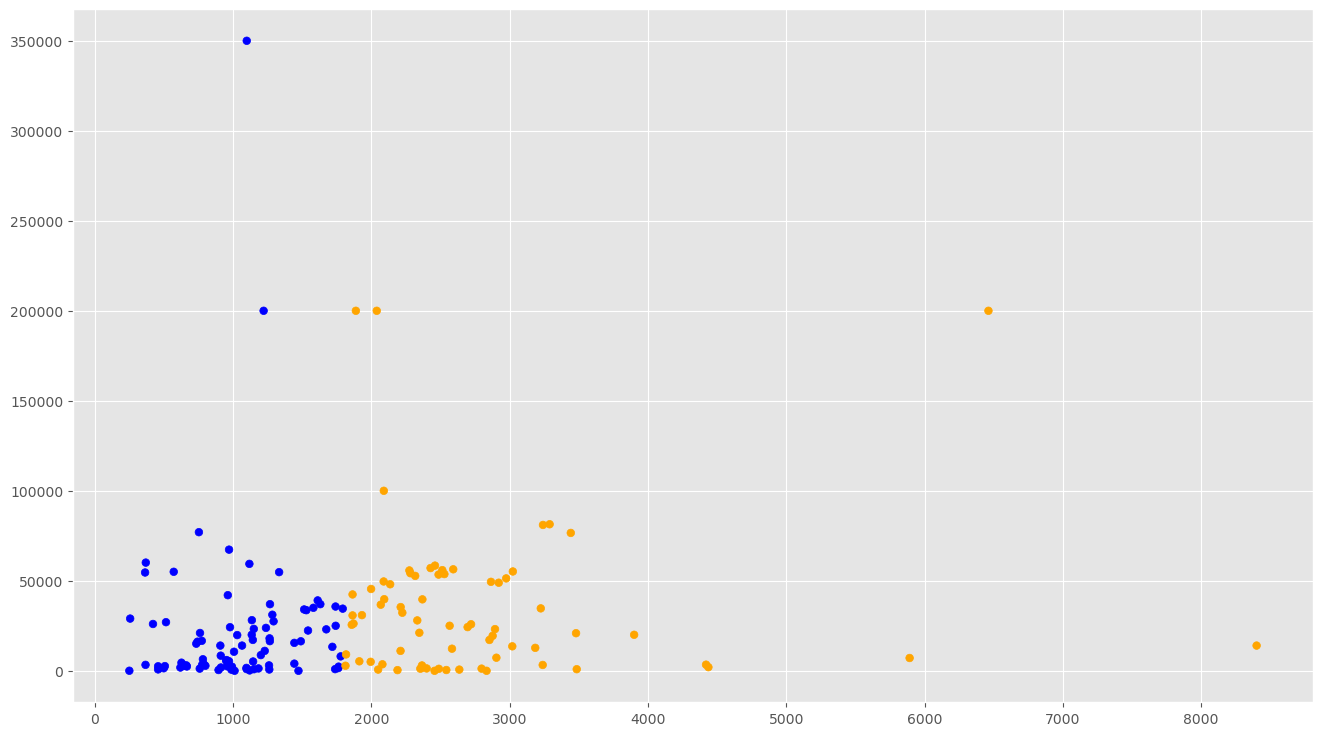

In [354]:
#Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

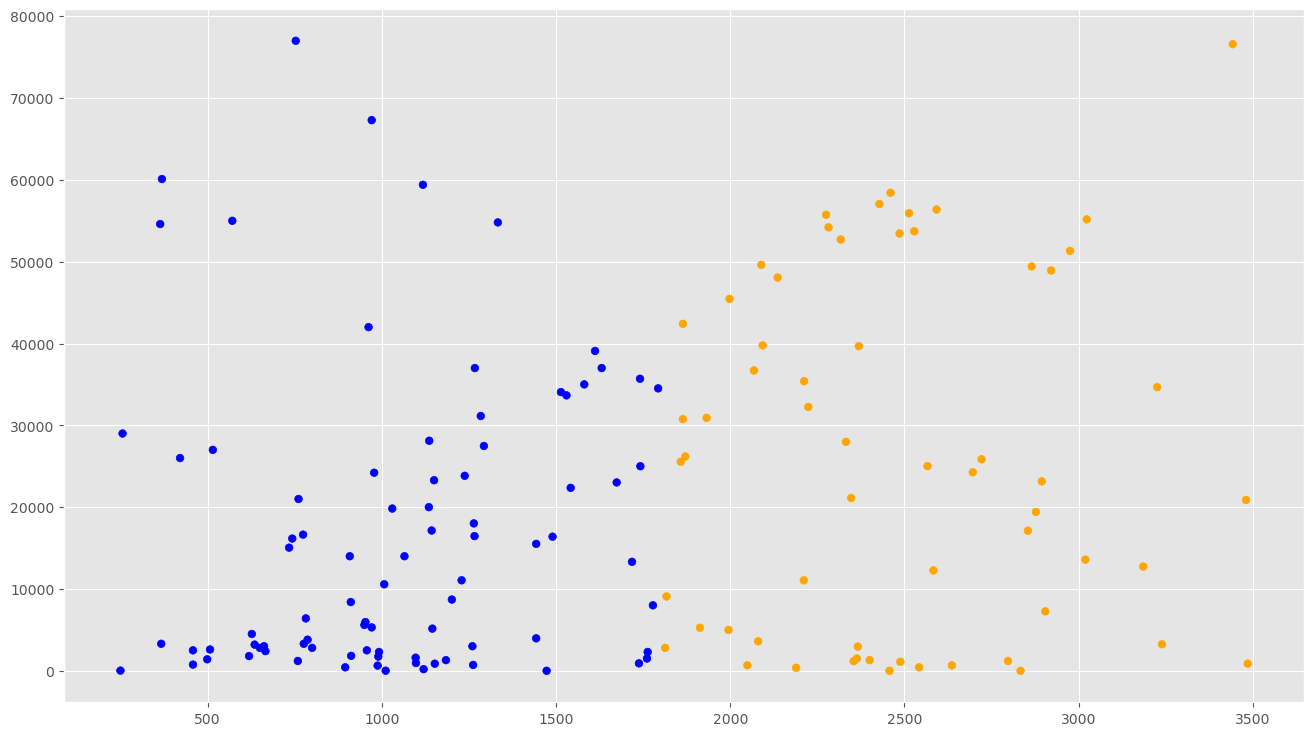

In [355]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [356]:
# Veamos como cambian los valores una vez filtrados
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


## Regresión Lineal Simple (1 variable)

Vamos a intentar primero una Regresión Lineal con 1 sóla variable

In [359]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [360]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

# Display model parameters
print('Slope = ', regr.coef_)
print('Intercept = ', regr.intercept_)### Step 4: Postprocessing

Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06
Slope =  [5.69765366]
Intercept =  11200.303223074163


## Visualizamos la Recta que obtuvimos

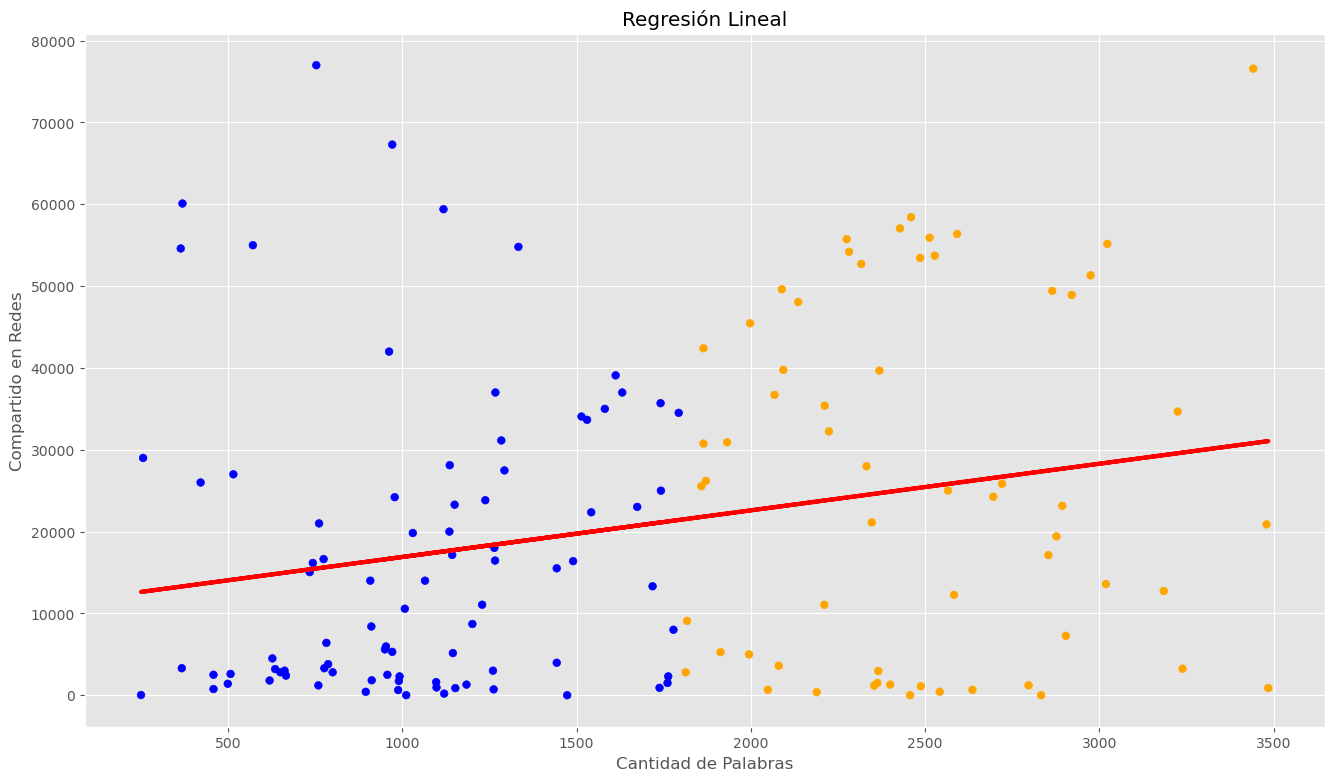

In [362]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

### Predicción 1

In [364]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[761]]) #1888-->200000, 1742-->25000, 761-->21000
print(int(y_Dosmil[0]))

15536


Evidentemente No es tan sencillo...

Vamos a mejorar un poco el modelo

# Regresión Lineal Múltiples (múltiples variables)

In [366]:
#Vamos a intentar mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

Atención: Esta vez, nuestras dimensiones de entrenamiento serán X e Y y las etiquetas de predicción serán z.

In [368]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))
print('Intercept = ', regr2.intercept_)### Step 4: Postprocessing

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11
Intercept =  16921.89109834336


## Esta vez visualizamos un plano

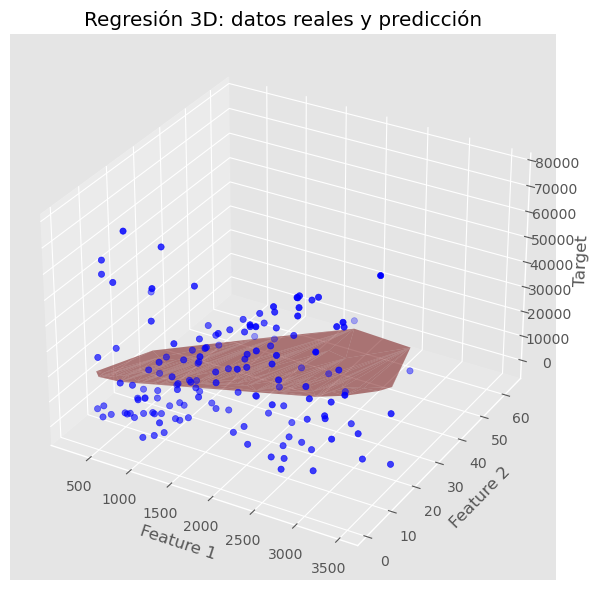

In [370]:
X = XY_train
y = z_train
y_pred2 = z_pred

# X tiene dos columnas: X[:, 0] y X[:, 1]
x1 = X[:, 0]
x2 = X[:, 1]

# Crear figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos reales
ax.scatter(x1, x2, y, color='blue', label='Datos reales')

# Superficie de predicción (predicción sobre una grilla es más suave, pero esto sirve)
ax.plot_trisurf(x1, x2, y_pred2, alpha=0.5, color='red', label='Plano de predicción')

# Etiquetas
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Regresión 3D: datos reales y predicción')
plt.tight_layout()
plt.show()


### Predicción 2

In [372]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con: 
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:

z_Dosmil = regr2.predict([[761, 0+0+1]]) #1888-->200000, 1742-->25000, 761-->21000
print(int(z_Dosmil[0]))

21485


## Comparemos las predicciónes obtenidas en los modelos

En este caso, Obtuvimos mejora en el modelo de 2 dimensiones

In [375]:
# Restamos los errores calculados antes:
# Obviamente, "menos error" es mejor
mejoraEnError = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred)
print(mejoraEnError)

20765911.860715985


In [376]:
# También calculamos la mejora en la varianza:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print(mejoraEnVarianza)
# Aunque no parezca mucho, recordemos que el valor más alto que se puede obtener es 1.0

0.052615337462582956


In [377]:
# Finalmente, mejoramos en nuestra predicción de un artículo de 2.000 palabras, 
# pues aunque disminuyen los "Shares" que obtendremos en el 2do modelo, 
# seguramente será un valor más cercano a la realidad
diferenciaComparir = z_Dosmil - y_Dosmil
print(int(diferenciaComparir[0]))

5949


## ¿Qué conclusiones puedes generar de este ejercicio?

¿Qué ocurrió con el segundo modelo?

¿Por qué mejoró la predicción?

## Visualizamos como se comporta el error en entrenamiento y prueba si dividimos los datos

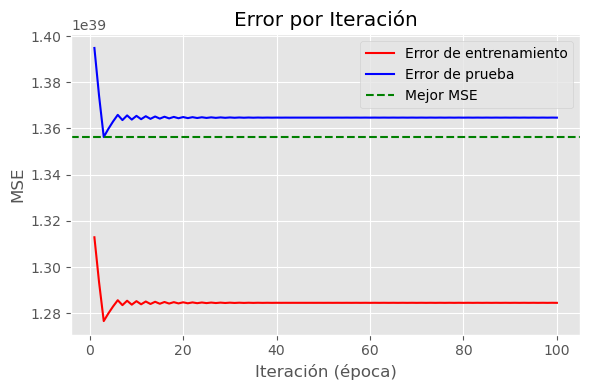

In [441]:
# Division de datos en entrenamiento y pruebas para eliminar el sobreajuste 
# Visualizar las curvas de errores
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import copy

# Crear datos
X = XY_train
y = z_train

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Parámetros
n_epochs = 100
train_errors = []
test_errors = []
best_model = None
best_test_error = np.inf  # Inicialmente infinito

# Inicializar modelo SGD (warm_start=True para entrenamiento incremental)
model = SGDRegressor(max_iter=1, tol=None, learning_rate='optimal', eta0=0.001, warm_start=True, random_state=42)
# Entrenamiento manual por iteraciones
for epoch in range(n_epochs):
    model.fit(X_train2, y_train2)

    # Predecir y calcular errores
    y_train_pred = model.predict(X_train2)
    y_test_pred = model.predict(X_test2)
    train_mse = mean_squared_error(y_train2, y_train_pred)
    test_mse = mean_squared_error(y_test2, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    # Guardar el mejor modelo (menor error de prueba)
    if test_mse < best_test_error:
        best_test_error = test_mse
        best_model = copy.deepcopy(model)  # Importante: copiar el modelo actual


# Graficar errores por iteración
plt.figure(figsize=(6, 4))
plt.plot(range(1, n_epochs + 1), train_errors, label="Error de entrenamiento", color="red")
plt.plot(range(1, n_epochs + 1), test_errors, label="Error de prueba", color="blue")
plt.axhline(best_test_error, color='green', linestyle='--', label='Mejor MSE')
plt.xlabel("Iteración (época)")
plt.ylabel("MSE")
plt.title("Error por Iteración")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [429]:
yG

array([19828,  1500,  1824, 26000, 57058, 55000,  5261,    22, 27476,
       60100,  5300, 53449, 25019, 30756, 35392, 51319,  3800, 48060,
       16641,  3600,  6400, 19420,  4500, 48927,  1200,  3000, 35691,
        9085, 55170, 37000, 26194,  3300, 11055,  2500, 59400, 16160,
       18012, 33660,  1300, 20000,  3200, 12740, 16390,  2958,   196],
      dtype=int64)

C:\Users\m_mir\anaconda3\Lib\site-packages\matplotlib\tri\_triangulation.py:181: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)


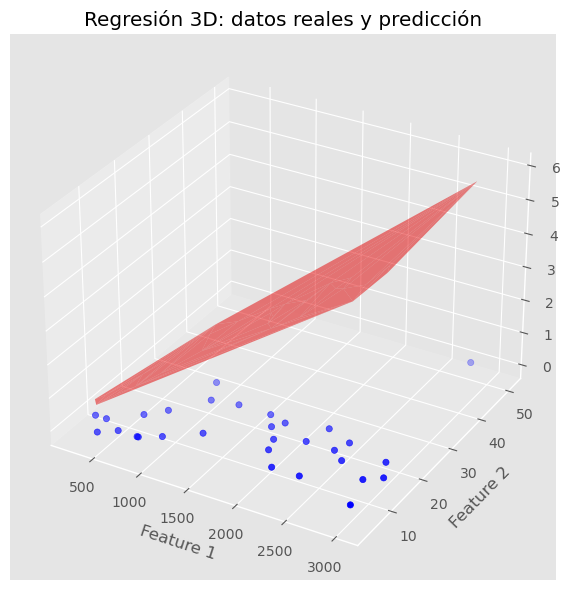

In [443]:
XG = X_test2
yG = y_test2
y_pred3 = best_model.predict(XG)

# X tiene dos columnas: X[:, 0] y X[:, 1]
x1 = XG[:, 0]
x2 = XG[:, 1]

# Crear figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos reales
ax.scatter(x1, x2, yG, color='blue', label='Datos reales')

# Superficie de predicción (predicción sobre una grilla es más suave, pero esto sirve)
ax.plot_trisurf(x1, x2, y_pred3, alpha=0.5, color='red', label='Plano de predicción')

# Etiquetas
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Regresión 3D: datos reales y predicción')
plt.tight_layout()
plt.show()


### Predicción 3

In [445]:
z_Dosmil2 = best_model.predict([[1888, 0+0+1]]) #1888-->200000, 1742-->25000, 761-->21000
print(int(z_Dosmil2[0]))

37024738850719383552


## ¿Qué conclusiones finales puedes tener?

¿Qué ocurrió con el tercer modelo?

¿Por qué empeoró la predicción?,¿Cómo podríamos mejorar?